Plots to show average omega22

In [5]:
import sys
sys.path.append("../../")

In [6]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# We choose a waveform that has moderate eccentricity

In [8]:
filepath = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.3042436177_Momega00.010_meanAno1.571.h5"
filepath_zeroecc = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002_meanAno1.571.h5"

In [9]:
waveform_kwargs = {"filepath": filepath,
                   "filepath_zero_ecc": filepath_zeroecc,
                   "include_zero_ecc": True}

In [10]:
dataDict = load_waveform("EOB", **waveform_kwargs)

In [11]:
tref_in = dataDict["t"]

In [12]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

In [14]:
?measure_eccentricity

Signature:
measure_eccentricity(
    tref_in=None,
    fref_in=None,
    dataDict=None,
    method='Amplitude',
    return_ecc_method=False,
    spline_kwargs=None,
    extra_kwargs=None,
)
Docstring:
Measure eccentricity and mean anomaly at reference time.

parameters:
----------
tref_in:
    Input reference time at which to measure eccentricity and mean anomaly.
    Can be a single float or an array. NOTE: eccentricity/mean_ano are
    returned on a different time array tref_out, described below.

fref_in:
    Input reference frequency at which to measure the eccentricity and
    mean anomaly. It can be a single float or an array.
    NOTE: eccentricity/mean anomaly are returned on a different freq
    array fref_out, described below.

    Given an fref_in, we find the corresponding tref_in such that,
    omega22_average(tref_in) = 2 * pi * fref_in.
    Here, omega22_average(t) is a monotonically increasing average
    frequency that is computed from the instantaneous omega22(t).
   

Text(0, 0.5, '$\\omega_{22}$ [rad/$M$]')

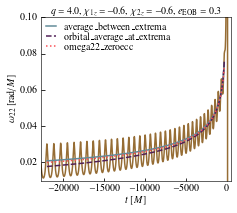

In [46]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
method = "ResidualAmplitude"
fref_in = 0.04/2/np.pi
lstyles = ["-", "--", ":"]
lcs = [colorsDict["apastron"], colorsDict["periastron"], colorsDict["vline"]]
for idx, avg_method in enumerate(["average_between_extrema", "orbital_average_at_extrema", "omega22_zeroecc"]):
    tref, ecc, meanAno, eccMethod = measure_eccentricity(fref_in=fref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"omega22_averaging_method": avg_method})
    if idx == 0:
        ax.plot(eccMethod.t, eccMethod.omega22, c=colorsDict["default"])
    ax.plot(eccMethod.t_for_omega22_average, eccMethod.omega22_average, label=avg_method, c=lcs[idx], ls=lstyles[idx])   
ax.legend(loc="upper left", handlelength=1, labelspacing=0.1, borderaxespad=0.1)
ax.set_xlim(eccMethod.t[0], 500)
ax.set_ylim(0.01, 0.1)
ax.set_title(fr"$q={4:.1f}$, $\chi_{{1z}}={-0.6:.1f}$, $\chi_{{2z}}={-0.6:.1f}$, $e_{{\mathrm{{EOB}}}}={0.3:.1f}$", fontsize=10, va="center")
ax.set_xlabel(r"$t$ [$M$]")
ax.set_ylabel(r"$\omega_{22}$ [rad/$M$]")

In [47]:
fig.subplots_adjust(left=0.17, bottom=0.13, right=0.98, top=0.94)
fig.savefig("../figs/omega22_average.pdf")

In [19]:
eccMethod.get_availabe_omega22_averaging_methods()

{'average_between_extrema': <bound method eccDefinition.compute_omega22_average_between_extrema of <measureEccentricity.eccDefinitionUsingAmplitude.eccDefinitionUsingAmplitude object at 0x7fabdad885b0>>,
 'orbital_average_at_extrema': <bound method eccDefinition.compute_orbital_averaged_omega22_at_extrema of <measureEccentricity.eccDefinitionUsingAmplitude.eccDefinitionUsingAmplitude object at 0x7fabdad885b0>>,
 'omega22_zeroecc': <bound method eccDefinition.compute_omega22_zeroecc of <measureEccentricity.eccDefinitionUsingAmplitude.eccDefinitionUsingAmplitude object at 0x7fabdad885b0>>}